#Spatial Clustering of NYC Taxi Pickups: Uncovering Popular Spots with DBSCAN

The NYC Taxi Trip Data contains information about taxi trips in New York City, including pickup and drop-off locations. This data can be used to perform spatial clustering to identify popular pickup or drop-off points.

**Instructions to Download the Dataset**

* Visit the Kaggle NYC Taxi Trip Duration Dataset page.
* Sign in to Kaggle and download the train.csv file.

Here is the dataset link you can use:
[https://www.kaggle.com/c/nyc-taxi-trip-duration/data](https://www.kaggle.com/c/nyc-taxi-trip-duration/data)

## Data Loading

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load the dataset
# Replace 'train.csv' with the path to your downloaded file
df = pd.read_csv('/content/drive/MyDrive/GIthub_Repo_Datasets/NYC-Taxi-Trip-Data.csv')


## Sampling

In [42]:
# Extract pickup coordinates (latitude, longitude)
sampled_df = df[['pickup_latitude', 'pickup_longitude']].sample(n=150000, random_state=42) # use only 150000 data sample

# Convert the sampled coordinates to a numpy array
coords = sampled_df.to_numpy()

##  NYC Map Visualization


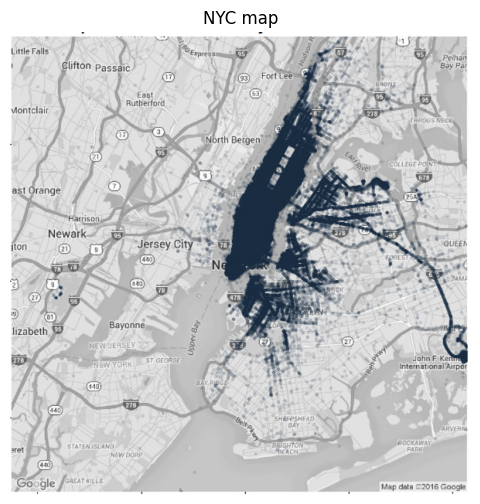

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('/content/NYC.jpg')

# Plot the image
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title('NYC map')
plt.show()

##Ploting all the data points

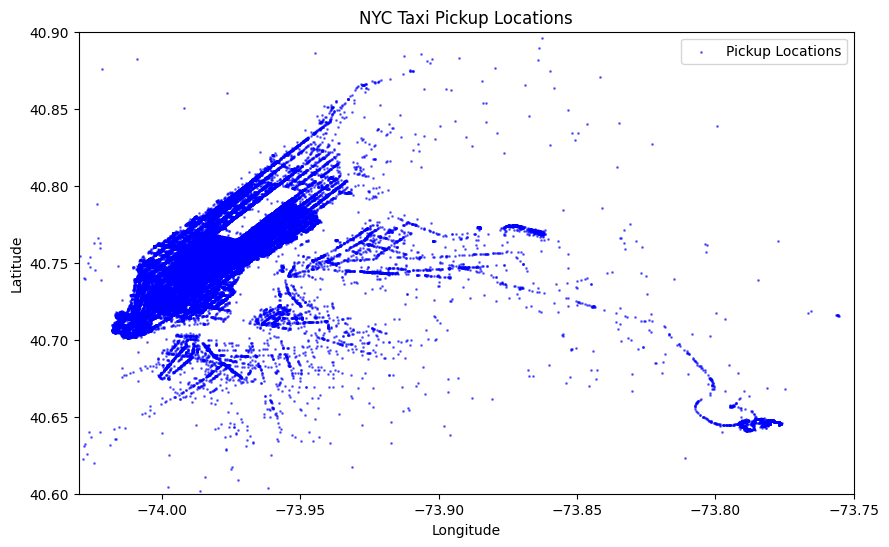

In [44]:
# Plotting the sampled coordinates
plt.figure(figsize=(10, 6))
plt.scatter(coords[:, 1], coords[:, 0], s=1, alpha=0.5, c='blue', label='Pickup Locations')

# zoom in
plt.xlim(-74.03, -73.75)
plt.ylim(40.6, 40.9)

plt.title('NYC Taxi Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

## Define the DBSCAN model

`Epsilon (ε)`

It is a key parameter in DBSCAN that defines the radius of the neighborhood around each data point. It directly influences the formation of clusters by determining how close points need to be to each other to be considered part of the same cluster. The choice of epsilon depends on the scale and distribution of your data, and it must be chosen carefully to achieve meaningful clustering results.

**`Suppose you are clustering geographic data (latitude and longitude points)`**:

If you set epsilon to 0.5 kilometers (converted to radians as needed), DBSCAN will look for other data points within a 0.5 km radius to form clusters.
Points that are closer than 0.5 km to each other will likely be grouped into the same cluster.
If no other points are within 0.5 km, the point might be classified as noise.

In [45]:
# Define the DBSCAN model
kms_per_radian = 6371.0088
epsilon = 0.5 / kms_per_radian  # 0.5 km in radians

# Use haversine metric to account for spherical distance
db = DBSCAN(eps=epsilon, min_samples=100, algorithm='auto', metric='haversine')
db.fit(np.radians(coords))

# Extract cluster labels
labels = db.labels_

In the DBSCAN function, the algorithm parameter specifies the method used for computing the nearest neighbors, which affects how efficiently the DBSCAN algorithm can handle the data. Here’s what each option means:

**Algorithms for Nearest Neighbor Search**

`'auto'`:
Automatically chooses the best algorithm based on the dataset. It tries to use the most efficient method for the given data.
This is a convenient option if you want the algorithm to select the best option for you without specifying it manually.

`'ball_tree'`:
Uses a Ball Tree data structure to compute nearest neighbors. A Ball Tree is a binary tree used to partition space into nested spheres (balls) to efficiently find nearest neighbors.
This is effective for datasets where the number of dimensions is relatively low. It performs well with spherical data and can handle large datasets efficiently.

`'kd_tree'`:
Uses a KD Tree (k-dimensional tree) for nearest neighbor searches. A KD Tree is a binary tree used to partition space into hyperplanes, which is effective for multidimensional data.
Suitable for low-dimensional data and can be faster than Ball Tree in some cases. It is particularly useful when you have more than a few dimensions.

`'brute'`:
Uses a brute-force approach to compute all pairwise distances between points. It calculates distances between all pairs of points in the dataset.
This is less efficient for large datasets but may be used when other algorithms are not suitable or if you are working with very small datasets.

##Cluster Visualization

### Ploting the clusters without Noise

Number of clusters: 9


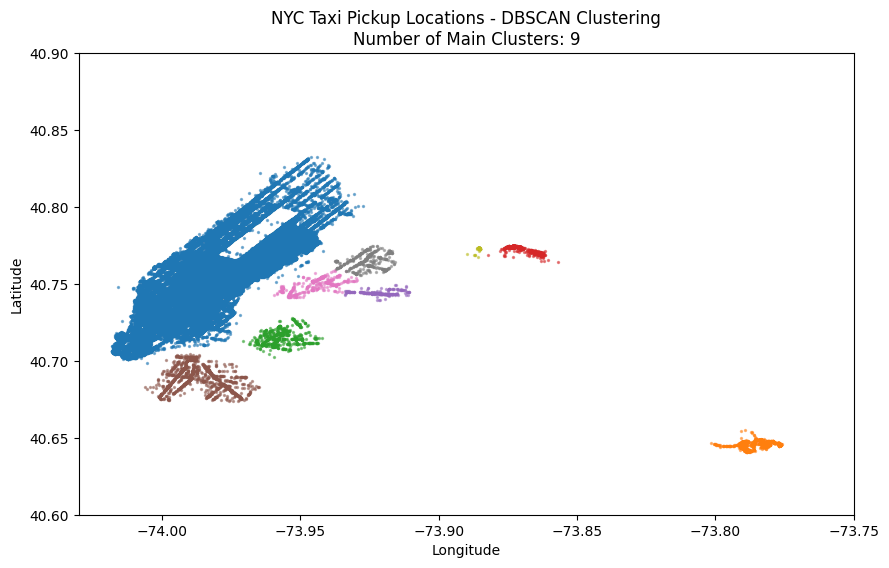

In [46]:
# Number of clusters in labels, ignoring noise (-1)
num_clusters = len(set(labels) - set([-1]))
print(f'Number of clusters: {num_clusters}')

# Convert clustered data to a DataFrame
clusters = pd.Series([coords[labels == n] for n in range(num_clusters)])

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in clusters:
    plt.scatter(cluster[:, 1], cluster[:, 0], s=2, alpha=0.5)

plt.xlim(-74.03, -73.75)
plt.ylim(40.6, 40.9)

plt.title(f'NYC Taxi Pickup Locations - DBSCAN Clustering\nNumber of Main Clusters: {num_clusters}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Plotting the clusters with noise

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


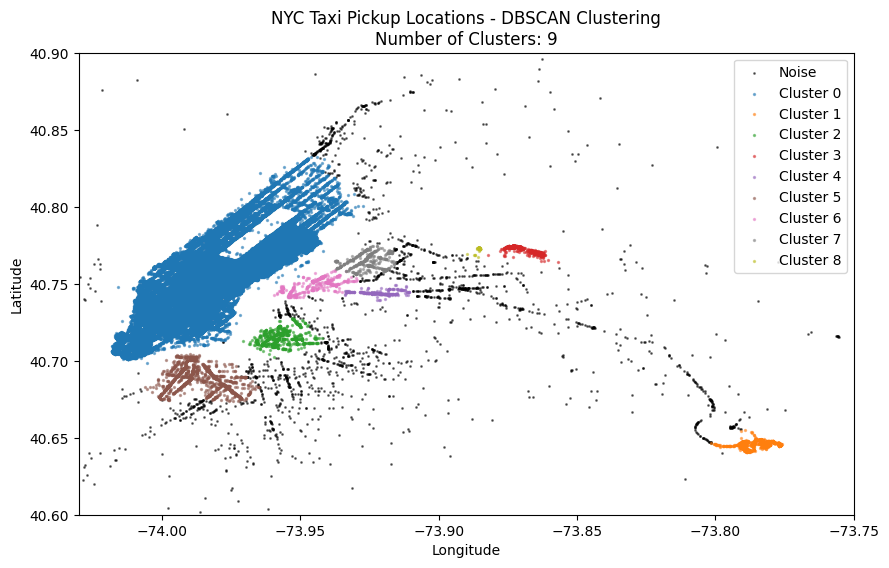

In [47]:
plt.figure(figsize=(10, 6))

# Plot noise points (label -1) in black
noise = coords[labels == -1]
plt.scatter(noise[:, 1], noise[:, 0], s=1, c='black', alpha=0.5, label='Noise')

# Plot clusters
unique_labels = set(labels)
for label in unique_labels:
    if label != -1:  # Exclude noise points
        cluster = coords[labels == label]
        plt.scatter(cluster[:, 1], cluster[:, 0], s=2, alpha=0.5, label=f'Cluster {label}')

# Set axis limits to zoom in on the specified region
plt.xlim(-74.03, -73.75)
plt.ylim(40.6, 40.9)

plt.title(f'NYC Taxi Pickup Locations - DBSCAN Clustering\nNumber of Clusters: {num_clusters}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

End